In [27]:
import pandas as pd
import igraph as ig
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_excel('/Users/Dell/Downloads/autism_vcf/vaf.xlsx',index_col=0)

In [39]:
df=df.astype(float)

In [41]:
df.dtypes

rs6659553     float64
rs4971053     float64
rs2147377     float64
rs2306916     float64
rs9479297     float64
rs4738824     float64
rs7460625     float64
rs2419565     float64
rs3741265     float64
rs1051375     float64
rs10848683    float64
rs10774053    float64
rs2468255     float64
rs772897      float64
rs8022395     float64
rs1748971     float64
rs1617510     float64
rs4777755     float64
rs11074121    float64
rs2953000     float64
rs2952999     float64
dtype: object

In [62]:
df

,rs2147377,rs2306916,rs9479297,rs4738824,rs7460625,rs3741265,rs1051375,rs772897,rs4777755,rs11074121,rs2953000,rs2952999
sample1,1.000000,1.000000,1.000000,0.491525,1.000000,1.000000,1.000000,0.469697,1.000000,1.000000,0.604167,0.591837
sample2,1.000000,1.000000,1.000000,0.620690,1.000000,1.000000,0.448980,1.000000,1.000000,1.000000,0.615385,0.619048
sample3,0.983871,1.000000,0.571429,1.000000,1.000000,1.000000,0.366197,1.000000,1.000000,1.000000,1.000000,1.000000
sample4,1.000000,1.000000,1.000000,0.521739,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sample5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.454545,1.000000,1.000000,1.000000,1.000000
sample6,1.000000,1.000000,1.000000,0.450980,0.511111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sample7,1.000000,1.000000,1.000000,1.000000,0.400000,1.000000,1.000000,0.531250,1.000000,1.000000,0.340909,0.355556
sample8,1.000000,0.460317,0.500000,1.000000,1.000000,0.391304,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sample9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.525773,1.000000,1.000000,1.000000,0.520833,0.529412
sample10,1.000000,0.979592,1.000000,0.489362,1.000000,1.000000,0.470000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df.describe()

,rs6659553,rs4971053,rs2147377,rs2306916,rs9479297,rs4738824,rs7460625,rs2419565,rs3741265,rs1051375,...,rs10774053,rs2468255,rs772897,rs8022395,rs1748971,rs1617510,rs4777755,rs11074121,rs2953000,rs2952999
count,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.000000,...,19.0,19.0,19.000000,19.0,19.0,19.0,19.000000,19.000000,19.000000,19.000000
mean,1.0,1.0,0.999151,0.970522,0.927295,0.842256,0.896243,1.0,0.967963,0.824299,...,1.0,1.0,0.831073,1.0,1.0,1.0,0.966727,0.967544,0.806170,0.804293
std,0.0,0.0,0.003700,0.123640,0.172931,0.241187,0.202497,0.0,0.139644,0.267193,...,0.0,0.0,0.257763,0.0,0.0,0.0,0.145033,0.141473,0.269150,0.271518
min,1.0,1.0,0.983871,0.460317,0.500000,0.428571,0.400000,1.0,0.391304,0.366197,...,1.0,1.0,0.354839,1.0,1.0,1.0,0.367816,0.383333,0.340909,0.333333
25%,1.0,1.0,1.000000,1.000000,1.000000,0.571214,0.970395,1.0,1.000000,0.497887,...,1.0,1.0,0.530931,1.0,1.0,1.0,1.000000,1.000000,0.562500,0.560624
50%,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,...,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000
75%,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,...,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000
max,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,...,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000


In [49]:
# Assuming 'df' is your DataFrame
cols_to_drop = [col for col in df.columns if df[col].mean() == 1]
df = df.drop(columns=cols_to_drop)


In [51]:
df.corr()

,rs2147377,rs2306916,rs9479297,rs4738824,rs7460625,rs3741265,rs1051375,rs772897,rs4777755,rs11074121,rs2953000,rs2952999
rs2147377,1.000000,-0.057736,0.498330,-0.158381,-0.124080,-0.055556,0.415184,-0.158702,-0.055556,-0.055556,-0.174394,-0.174547
rs2306916,-0.057736,1.000000,0.595330,-0.145184,-0.128951,0.999285,-0.147302,-0.164932,-0.057736,-0.057736,-0.181240,-0.181399
rs9479297,0.498330,0.595330,1.000000,-0.290250,-0.214786,0.598355,0.344118,-0.290839,0.532301,0.532301,0.027868,0.037314
rs4738824,-0.158381,-0.145184,-0.290250,1.000000,0.242967,-0.158381,-0.040477,-0.211477,-0.158381,-0.158381,-0.200068,-0.198955
rs7460625,-0.124080,-0.128951,-0.214786,0.242967,1.000000,-0.124080,-0.345418,-0.055101,-0.103100,-0.103100,0.025096,0.012681
rs3741265,-0.055556,0.999285,0.598355,-0.158381,-0.124080,1.000000,-0.159240,-0.158702,-0.055556,-0.055556,-0.174394,-0.174547
rs1051375,0.415184,-0.147302,0.344118,-0.040477,-0.345418,-0.159240,1.000000,-0.152489,0.355711,0.355711,0.121562,0.121402
rs772897,-0.158702,-0.164932,-0.290839,-0.211477,-0.055101,-0.158702,-0.152489,1.000000,-0.158702,-0.158702,0.379128,0.380173
rs4777755,-0.055556,-0.057736,0.532301,-0.158381,-0.103100,-0.055556,0.355711,-0.158702,1.000000,1.000000,0.404001,0.420039
rs11074121,-0.055556,-0.057736,0.532301,-0.158381,-0.103100,-0.055556,0.355711,-0.158702,1.000000,1.000000,0.404001,0.420039


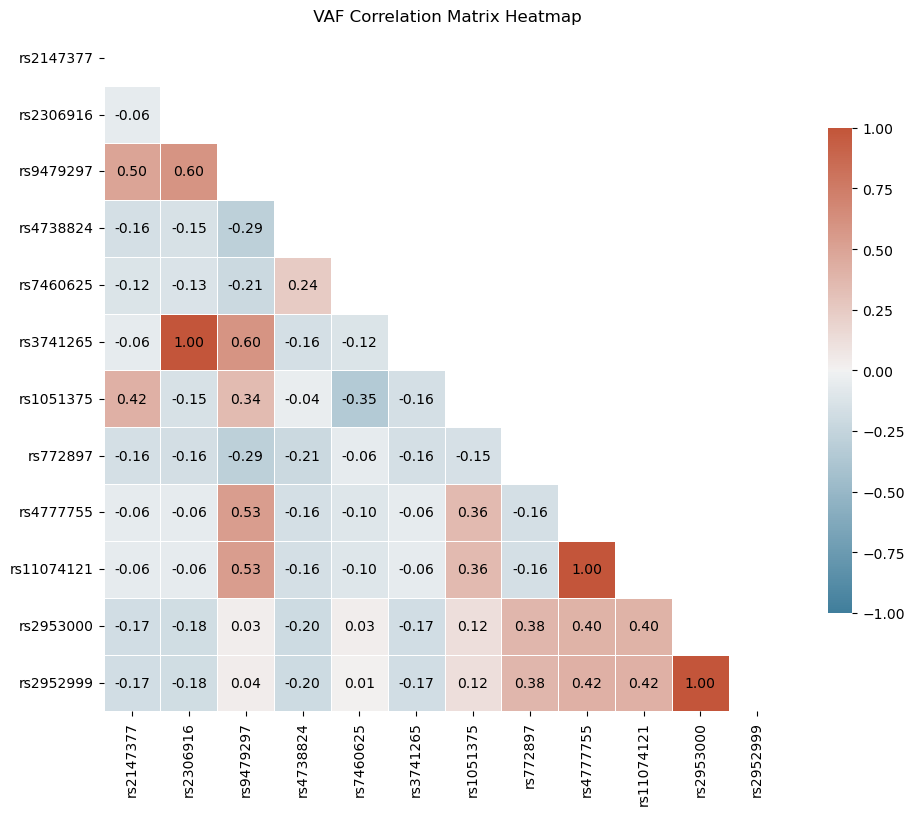

In [89]:
# Compute the correlation matrix (and ignore NaN values)
corr = df.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, annot=True, fmt=".2f", annot_kws={'color':'black'})
ax.set_title(' VAF Correlation Matrix Heatmap')
plt.show()

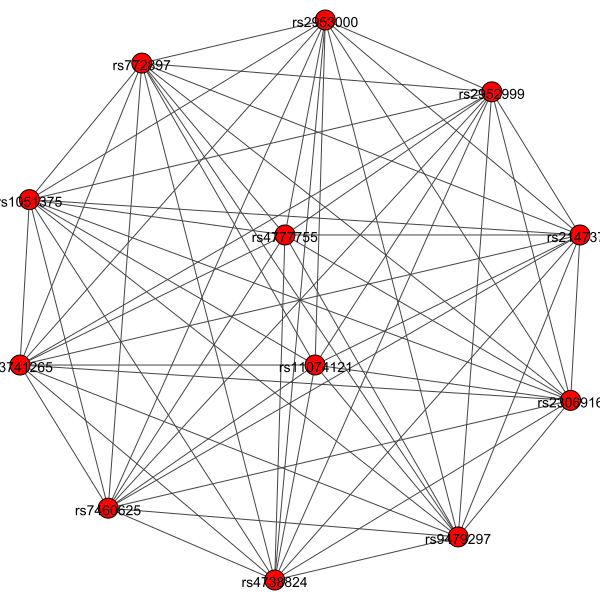

In [60]:
# Compute the correlation matrix
corr_matrix = df.corr(method='pearson')

# Convert the correlation matrix to a list of lists
corr_matrix_values = corr_matrix.values.tolist()

# Create a graph from the correlation matrix
graph = ig.Graph.Weighted_Adjacency((1 - np.array(corr_matrix_values)).tolist(), mode=ig.ADJ_UNDIRECTED, attr="weight", loops=False,)
graph.es['weight'] = corr_matrix_values
graph.vs['label'] = df.columns  # or a.index/a.columns

# Plot the graph
ig.plot(graph)



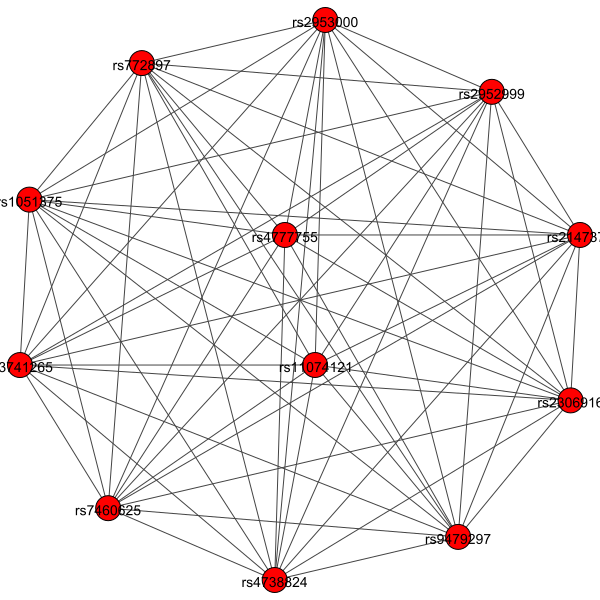

In [70]:
# Compute the correlation matrix
corr_matrix = df.corr(method='pearson')

# Convert the correlation matrix to a list of lists
corr_matrix_values = corr_matrix.values.tolist()

# Create a graph from the correlation matrix
graph = ig.Graph.Weighted_Adjacency((1 - np.array(corr_matrix_values)).tolist(), mode=ig.ADJ_UNDIRECTED, attr="weight", loops=False)
graph.es['weight'] = corr_matrix_values
graph.vs['label'] = df.columns  # or a.index/a.columns

# Increase the node size
visual_style = {}
visual_style["vertex_size"] = 25  # Adjust as needed

# Add edge labels based on their weights
#graph.es["label"] = graph.es["weight"]

# Plot the graph with the specified visual style
ig.plot(graph, **visual_style)


In [71]:
df.columns

Index(['rs2147377', 'rs2306916', 'rs9479297', 'rs4738824', 'rs7460625',
       'rs3741265', 'rs1051375', 'rs772897', 'rs4777755', 'rs11074121',
       'rs2953000', 'rs2952999'],
      dtype='object')

In [72]:
f = list(df.columns)

In [73]:
genes_iden = 

['rs2147377',
 'rs2306916',
 'rs9479297',
 'rs4738824',
 'rs7460625',
 'rs3741265',
 'rs1051375',
 'rs772897',
 'rs4777755',
 'rs11074121',
 'rs2953000',
 'rs2952999']

In [74]:
import pandas as pd
import pickle

# Load the DataFrame from the pickle file
with open('my_dataframe.pkl', 'rb') as f:
    RD_v= pickle.load(f)

# Now you can use df in this notebook


In [75]:
RD_v

,rs6659553,rs4971053,rs2147377,rs2306916,rs9479297,rs4738824,rs7460625,rs2419565,rs3741265,rs1051375,...,rs10774053,rs2468255,rs772897,rs8022395,rs1748971,rs1617510,rs4777755,rs11074121,rs2953000,rs2952999
sample1,53,59,78,57,45,59,55,82,51,94,...,55,53,66,56,76,52,62,49,48,49
sample2,41,60,81,48,50,29,47,37,47,98,...,45,37,61,60,54,47,57,28,39,42
sample3,52,63,62,42,49,39,36,44,43,71,...,47,32,69,49,77,58,57,45,48,51
sample4,34,55,54,61,53,46,53,61,51,92,...,67,43,87,61,76,70,68,42,53,51
sample5,31,55,43,46,41,34,42,41,34,69,...,54,68,55,64,55,53,50,43,38,42
sample6,34,54,57,58,29,51,45,47,45,90,...,41,46,67,56,72,69,73,46,76,79
sample7,49,44,56,45,50,56,55,50,57,90,...,50,53,64,81,58,65,70,61,44,45
sample8,39,60,54,63,50,26,37,59,69,100,...,46,44,56,64,77,50,72,55,36,39
sample9,49,64,42,55,46,31,38,41,47,66,...,39,48,63,58,73,54,66,34,42,40
sample10,40,54,60,51,44,31,51,59,71,97,...,53,50,82,66,67,61,71,50,48,51


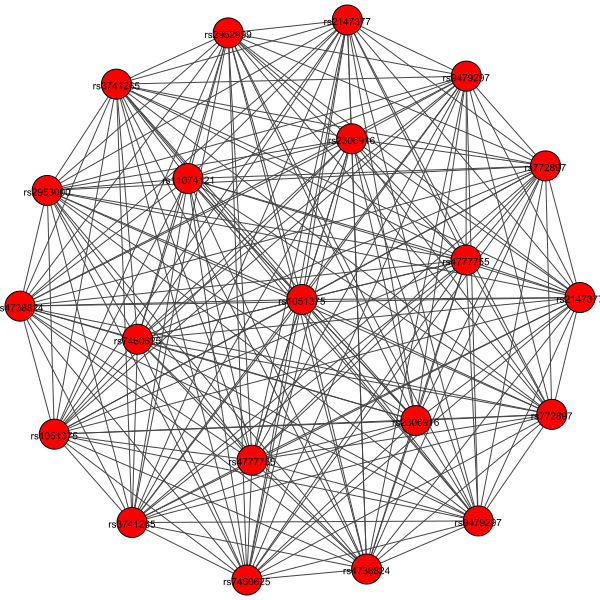

In [132]:
# Compute the correlation matrix
corr_matrix = RD_v.corr(method='pearson')

# Convert the correlation matrix to a list of lists
corr_matrix_values = corr_matrix.values.tolist()

# Create a graph from the correlation matrix
graph = ig.Graph.Weighted_Adjacency((1 - np.array(corr_matrix_values)).tolist(), mode=ig.ADJ_UNDIRECTED, attr="weight", loops=False)
graph.es['weight'] = corr_matrix_values
graph.vs['label'] = df.columns  # or a.index/a.columns

# Increase the node size
visual_style = {}
visual_style["vertex_size"] = 30  # Adjust as needed
visual_style["vertex_label_size"] = 10

# Add edge labels based on their weights
#graph.es["label"] = graph.es["weight"]


ig.plot(graph,**visual_style)



In [78]:
RD_corr = RD_v.corr()

In [80]:
RD_corr.to_excel('/Users/Dell/Downloads/autism_vcf/RD_corr.xlsx')

In [133]:
adjacency_matrix = np.where(RD_corr > 0, 1, 0)

In [146]:
import pandas as pd

def correlation_to_dataframe(df):
    df1 = df.stack().reset_index()
    df1.columns = ['RS_ID', 'rs_id', 'correlation']
    return df1


In [147]:
pair_wise = correlation_to_dataframe(RD_corr)

In [152]:
pair_wise.to_excel('/Users/Dell/Downloads/autism_vcf/pair_wise.xlsx')

In [154]:
pair_wise['RS_ID'].unique() == pair_wise['rs_id'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
vcf